# Invoice NER with FT [LayoutLMv3](https://huggingface.co/Theivaprakasham/layoutlmv3-finetuned-invoice)

In [1]:
from transformers import LayoutLMv3ForTokenClassification, AutoProcessor
from datasets import load_from_disk

import lovely_tensors as lt

from src.config import init_config
from src.invoice import process_invoice

## Config and settings

In [2]:
lt.monkey_patch()

In [3]:
config = init_config()

In [4]:
print(config)

data:
  fatura: mathieu1256/FATURA2-invoices
  rvl_cdip_subset: jinhybr/rvl_cdip_400_train_val_test
  invoiceXpert:
    hf_path: wiF0n/InvoiceXpert
    local_path: data/invoiceXpert
    num_labels: 2
    label_col: label
    image_col: image
    label_names:
    - invoice
    - not-invoice
models:
  classification:
    oob:
      pt: microsoft/dit-base
      ft: microsoft/dit-base-finetuned-rvlcdip
  retrieval:
    layoutlmv3: microsoft/layoutlmv3-base
    layoutlmv3_invoice_ft: Theivaprakasham/layoutlmv3-finetuned-invoice
mlflow:
  experiments:
    classification: invoice-classification
utils:
  seed: 420
  run_date: 2024-51-02/26/24



## Load the data

In [5]:
invoice_df = load_from_disk(config.data.invoiceXpert.local_path)

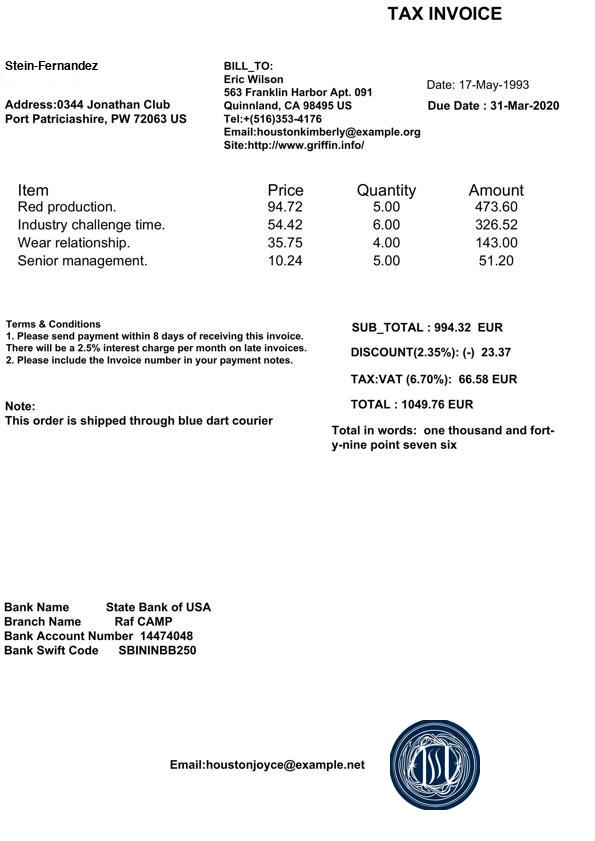

In [6]:
test_image = invoice_df["test"][1250]["image"]
test_image

## Load model

In [7]:
processor = AutoProcessor.from_pretrained(config.models.retrieval.layoutlmv3, apply_ocr=True)

In [8]:
model = LayoutLMv3ForTokenClassification.from_pretrained(config.models.retrieval.layoutlmv3_invoice_ft)

## Scoring

In [9]:
image, final_predicion = process_invoice(invoice_df["test"][1251]["image"], processor, model)

c:\Users\DAVID.KUBANDA\code\repos\InvoiceXpert\.venv\lib\site-packages\transformers\modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


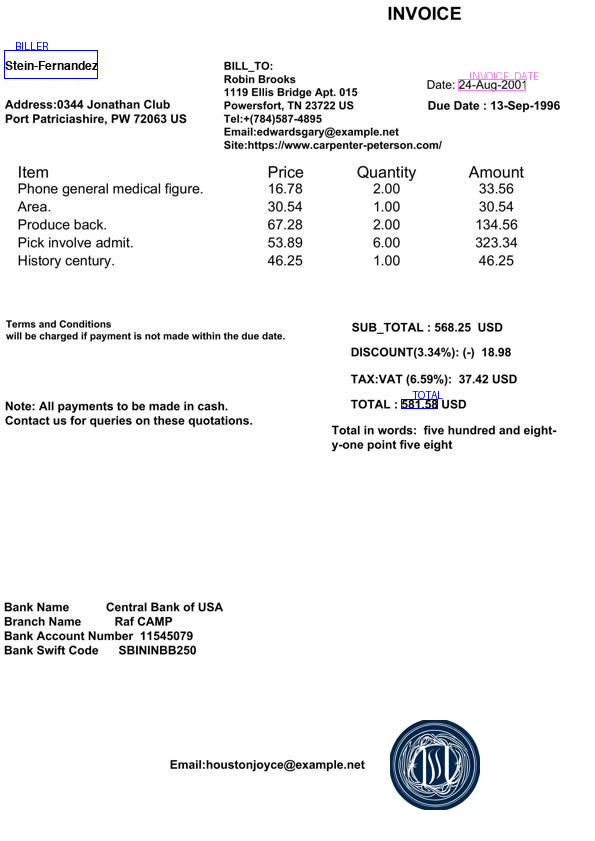

In [10]:
image

In [11]:
final_predicion

[{'word': ' Stein-Fernandez',
  'label': 'BILLER',
  'box': [4.76, 50.46, 97.58, 78.213]},
 {'word': ' 24-Aug-2001',
  'label': 'INVOICE_DATE',
  'box': [458.745, 79.895, 525.98, 90.828]},
 {'word': ' 581.58',
  'label': 'TOTAL',
  'box': [401.625, 399.47499999999997, 437.92, 408.726]}]